<a href="https://colab.research.google.com/github/sinheechan/Python_Read/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_Titanic_Custom_0105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 요청사항

- Q1. 탑승객 생존과 연관있는 데이터를 확인하고 싶다.
- Q2. 분석에 용이하게 데이터 시각화 요청


## 1. 패키지 로딩

In [2]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 행렬 제한

PREVIOUS_MAX_ROWS = pd.options.display.max_rows # 이전에 설정된 최대 표시 행 수 저장
pd.options.display.max_rows = 20 # 표시할 최대 행 수
pd.options.display.max_columns = 20 # 표시할 최대 열 수
pd.options.display.max_colwidth = 80 # 표시할 최대 열 너비

# 넘파이 옵션

np.random.seed(2024)
np.set_printoptions(precision = 4, suppress = True) # 넘파이 프린트옵션 : 소수점 이하 4자리 제한, 지수표현 비활성화

# 그래프 사이즈 조정

plt.rc("figure", figsize = (8, 4))

# 시본 그래프 사용 설정

sns.set_theme()

## 2. 데이터 불러오기

In [3]:
# scikit_learn

from sklearn.datasets import fetch_openml

# 예제에서의 세팅 값

X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## ** 데이터 설명서 **

- 1309명 승객의 데이터 포함.

- `X`: 13개의 열(특성) 사용.

| 열 특성 | 의미 |
| :--- | :--- |
| Pclass | 승객 클래스(1 = 1등석; 2 = 2등석; 3 = 3등석) |
| name | 이름 |
| sex | 성(male=남성, female=여성) |
| age | 나이 |
| sibsp | 함께 승선한 형제, 자매, 배우자 수 |
| parch | 함께 승선한 부모 자식 수 |
| ticket | 티켓 번호 |
| fare | 티켓 요금 (영국 파운드) |
| cabin | 객실 번호 |
| embarked | 승선한 항구 (C = Cherbourg; Q = Queenstown; S = Southampton) |
| boat | 침몰시 탑승한 구명보트 번호 |
| body | 사망자인 경우 지정된 번호 |
| home.dest | 고향/목적지 |

## 3. 데이터 기본구조 파악

In [4]:
X.shape

(1309, 13)

In [5]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
X.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
X.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body           object
home.dest      object
dtype: object

In [10]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['0', '1']

## 4. 데이터 정제 및 전처리

#### 4.1 y는 생존을 나타내는 코드로 원활한 분석을 위해 category -> int 로 변환

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype   
--------------  -----   
1309 non-null   category
dtypes: category(1)
memory usage: 1.5 KB


In [12]:
y = y.astype("i4")

#### 4.2 생존률과 관련 없는 데이터 제거

In [13]:
X.drop(['boat', 'body', 'home.dest', 'ticket'], axis = 1, inplace = True)

X

,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,B5,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,C22 C26,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,C22 C26,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,C22 C26,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,14.4542,None,C
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,14.4542,None,C
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,7.2250,None,C
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,7.2250,None,C


#### 4.3 결측치 제거

In [14]:
X.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
dtype: int64

- 결측치 개수만 봐서는 제거대상인지 모호하다.
- 하여 전체 데이터 대비 결측치 비율을 환산한다.
- (결측치 합/ 전체 값) * 100

In [15]:
null_value = (X.isnull().sum() / len(X)) * 100
null_value

pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
dtype: float64

- 결측치 비율이 많은 cabin 칼럼 삭제

In [16]:
X.drop(["cabin"], axis = 1, inplace = True)

In [17]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

#### 4.4 동반 탑승객과 혼자 탑승객을 분류

- family 칼럼 생성하여 동반 탑승자 수를 표시
  * sibsp	: 함께 승선한 형제, 자매, 배우자 수
  * parch	: 함께 승선한 부모 자식 수

In [18]:
X["family"] = pd.concat([X["sibsp"], X["parch"]], axis = 1, ).sum(axis = 1)

X.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,family
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,3.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,S,3.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,S,3.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,S,3.0


- family 칼럼 생성하여 sibsp, parch 데이터 합쳤으니 해당 칼럼 제거

In [19]:
X.drop(["sibsp", "parch"], axis = 1, inplace = True)

X.columns

Index(['pclass', 'name', 'sex', 'age', 'fare', 'embarked', 'family'], dtype='object')

- 혼자 탑승한 고객 alone 칼럼 생성

In [20]:
X["alone"] = "0"

family_zero = X["family"] == 0
X.loc[family_zero, "alone"] = 1

X.head(10)

,pclass,name,sex,age,fare,embarked,family,alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0.0,1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3.0,0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3.0,0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3.0,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3.0,0
5,1.0,"Anderson, Mr. Harry",male,48.0000,26.5500,S,0.0,1
6,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,77.9583,S,1.0,0
7,1.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0000,S,0.0,1
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,51.4792,S,2.0,0
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0000,49.5042,C,0.0,1


- 승객 이름 간소화 : 성별 구분기호에 따른 구분

In [21]:
# 명칭만 추출하는 title 칼럼 생성

X["title"] = X["name"].str.split(", ", expand = True)[1].str.split(". ", expand = True)[0]

# 기존 name 칼럼 삭제

X.drop(["name"], axis = 1, inplace = True)

X.head(10)

,pclass,sex,age,fare,embarked,family,alone,title
0,1.0,female,29.0000,211.3375,S,0.0,1,Miss
1,1.0,male,0.9167,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,151.5500,S,3.0,0,Miss
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs
5,1.0,male,48.0000,26.5500,S,0.0,1,Mr
6,1.0,female,63.0000,77.9583,S,1.0,0,Miss
7,1.0,male,39.0000,0.0000,S,0.0,1,Mr
8,1.0,female,53.0000,51.4792,S,2.0,0,Mrs
9,1.0,male,71.0000,49.5042,C,0.0,1,Mr


In [22]:
# 남성, 여성 고유명칭 파악

pd.crosstab(X["title"], X["sex"])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


남성 : Master, Mr / 여성 : Miss, Mrs / etc 로 나뉜다.


남성, 여성, etc 세 분류로 요약한다.

In [23]:
# 남성 요약

Man_title = (X.title == "Master") | (X.title == "Mr")
X.loc[Man_title, "title"] = "Man"

# 여성 요약

Woman_title = (X.title == "Miss") | (X.title == "Mrs")
X.loc[Woman_title, "title"] = "Woman"


# etc 요약

etc_title = (X["title"].value_counts() < 10 )

X["title"] = X.title.apply(lambda x: "etc" if etc_title[x] else x)

# 결과 확인

X["title"].value_counts()

Man      818
Woman    457
etc       34
Name: title, dtype: int64

## 5. 데이터 분석

#### 5.1 x, y 데이터 결합

In [24]:
Xy = pd.concat([X, y], axis=1)

Xy

,pclass,sex,age,fare,embarked,family,alone,title,survived
0,1.0,female,29.0000,211.3375,S,0.0,1,Woman,1
1,1.0,male,0.9167,151.5500,S,3.0,0,Man,1
2,1.0,female,2.0000,151.5500,S,3.0,0,Woman,0
3,1.0,male,30.0000,151.5500,S,3.0,0,Man,0
4,1.0,female,25.0000,151.5500,S,3.0,0,Woman,0
...,...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,1.0,0,Woman,0
1305,3.0,female,NaN,14.4542,C,1.0,0,Woman,0
1306,3.0,male,26.5000,7.2250,C,0.0,1,Man,0
1307,3.0,male,27.0000,7.2250,C,0.0,1,Man,0


#### 5.2 변수 간 상관성 확인

- 수치형 변수 목록 확인 : float

In [25]:
num_f = Xy.describe().columns

num_f

Index(['pclass', 'age', 'fare', 'family', 'survived'], dtype='object')

- 상관성 분석
  - 피어슨 상관계수 : 수치형 변수 상관성 요약표
  - 히트맵 시각화

In [26]:
corr = Xy[num_f].corr()

corr

,pclass,age,fare,family,survived
pclass,1.000000,-0.408106,-0.558629,0.050027,-0.312469
age,-0.408106,1.000000,0.178739,-0.240230,-0.055513
fare,-0.558629,0.178739,1.000000,0.226492,0.244265
family,0.050027,-0.240230,0.226492,1.000000,0.026876
survived,-0.312469,-0.055513,0.244265,0.026876,1.000000


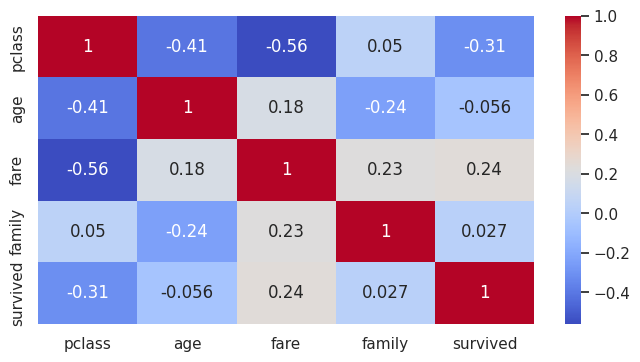

In [27]:
corr_hit = sns.heatmap(corr, annot = True, cmap = "coolwarm")

survived, familiy 변수가 fare(티켓요금)에 대해 상대적으로 높은 상관관계가 도출된다.

#### 5.3 변수 별 생존자 수 파악

In [28]:
sex_sur = Xy.survived.value_counts()

sex_sur

0    809
1    500
Name: survived, dtype: int64

- 탑승객 대비 생존자 수

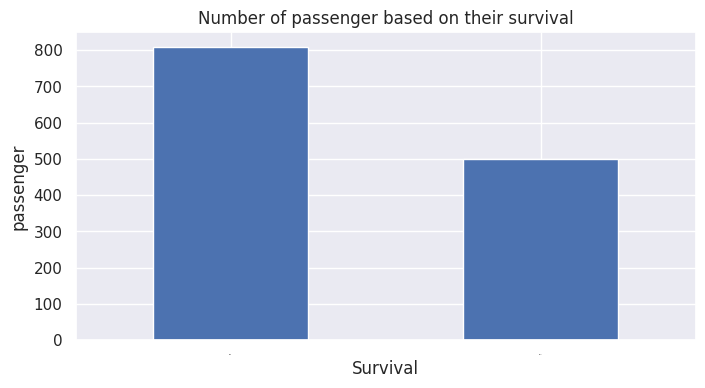

In [31]:
fig, ax = plt.subplots()

sex_sur.plot(kind = "bar", xticks = [0, 1], rot = 0)
ax.set_xticklabels(["died", "alive"], fontsize = 0)
ax.set(xlabel = "Survival", ylabel = "passenger", title = "Number of passenger based on their survival")
plt.show()

- 성별 생존자 수

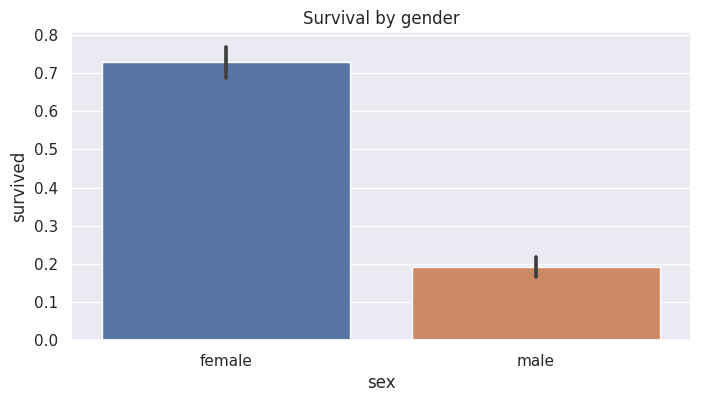

In [33]:
sns.barplot(data = Xy, x = "sex", y = "survived")
plt.title("Survival by gender")
plt.show()

- 나이대 별 생존자 수 분석

In [34]:
Xy.age.isnull().sum()

263

In [35]:
Xy.age.dropna()

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [36]:
Xy["age"][Xy.survived == 1].dropna()

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
         ...   
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: age, Length: 427, dtype: float64

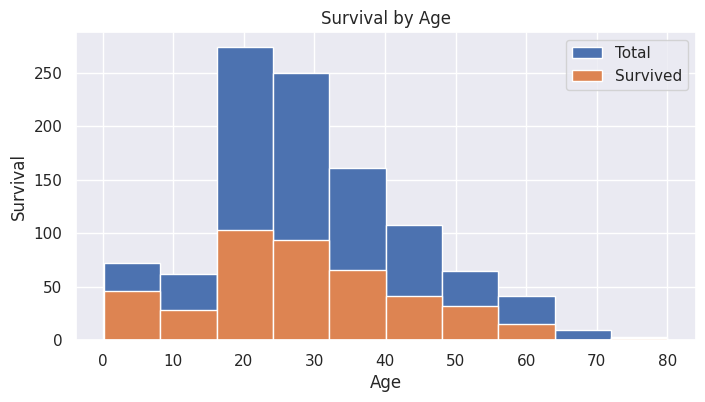

In [37]:
fig, ax = plt.subplots()
ax.hist(Xy.age.dropna(), label = "Total")
ax.hist(Xy["age"][Xy.survived == 1].dropna(), label = "Survived")

plt.xlabel("Age")
plt.ylabel("Survival")
plt.title("Survival by Age")

plt.legend()
plt.show()

20 ~ 30대의 생존자 수가 가장 높다.

- 10살 단위 구간으로 연령별 생존자 구하기

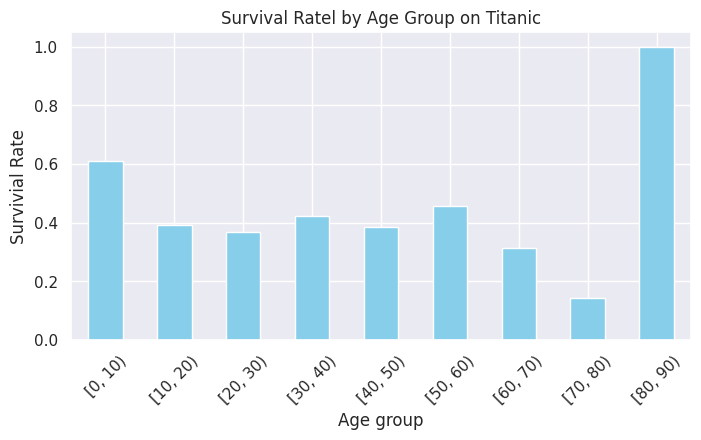

In [42]:
Xy["AgeGroup"] = pd.cut(Xy["age"], bins = range(0, 100, 10), right = False)
age_group_survival = Xy.groupby("AgeGroup")["survived"].mean()

age_group_survival.plot(kind = "bar", color = "skyblue")
plt.xlabel("Age group")
plt.ylabel("Survivial Rate")
plt.title("Survival Ratel by Age Group on Titanic")

plt.xticks(rotation = 45)
plt.show()

노인과 아이 위주로 생존률이 가장 높았다.

- Pclass 별 생존자 수 분석

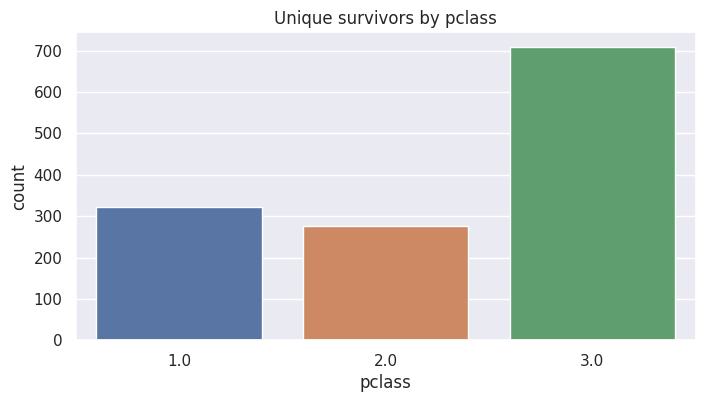

In [38]:
sns.countplot(x = "pclass", data = Xy)
plt.title("Unique survivors by pclass")
plt.show()

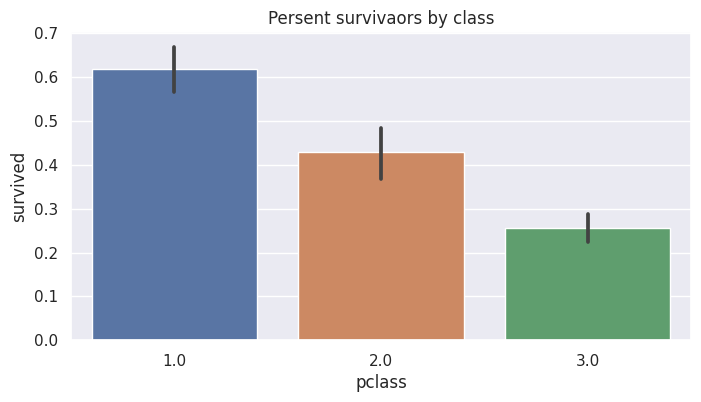

In [40]:
sns.barplot(x = "pclass", y = "survived", data = Xy)
plt.title("Persent survivaors by class")
plt.show()

3등석이 가장 많이 살아남았다.

하지만 pclass 각 클랙스 별 탑승객 대비 생존자 비율은 1등석이 가장 높게 분석되었다.

## 6. 분석 결과

#### 생존률 관련 분석 결과

- 탑승객 대비 생존자 분석
  - 탑승객 약 1300명 중 사망자 약 800명 중 생존자 약 500으로 추정

- 성별 생존자 분석
  - 남성 생존자 대비 여성 생존자 수가 약 3.5배 더 많이 나타났다.

- 연렵 별 생존자 분석
  - 20~30대 탑승객 및 생존 수가 가장 높게 나타났다.
  - 하지만 생존 비율 분석 결과 80~90대에서 가장 높은 생존률을 보였다.

- 객실 별 생존자 분석
  - 총 승객 수는 3등석이 가장 높았으나 생존 비율은 1등석 고객이 가장 큰 비율을 보였다.


- 위 분석 결과, 변수 간의 상관관계는 유의미한 수치를 보이지 않음
- 하지만 배가 침몰했을 당시, 여성, 1등석 승객 노년층, 아동 위주 구출한 것으로 보인다.